# Türkiye Yiyecek Fiyat Tahminlemesi


<img src='turkish-food.jpg'>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

In [3]:
df1.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [4]:
df2.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,1,2021,11.9249
1,National Average,52,Rice - Retail,5,KG,2,2021,12.8107
2,National Average,52,Rice - Retail,5,KG,3,2021,12.8107
3,National Average,52,Rice - Retail,5,KG,4,2021,12.8719
4,National Average,52,Rice - Retail,5,KG,5,2021,12.9061


In [5]:
df = pd.concat([df1,df2],axis=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8249 entries, 0 to 867
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        8249 non-null   object 
 1   ProductId    8249 non-null   int64  
 2   ProductName  8249 non-null   object 
 3   UmId         8249 non-null   int64  
 4   UmName       8249 non-null   object 
 5   Month        8249 non-null   int64  
 6   Year         8249 non-null   int64  
 7   Price        8249 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 580.0+ KB


In [7]:
df.describe()

,ProductId,UmId,Month,Year,Price
count,8249.000000,8249.000000,8249.000000,8249.000000,8249.000000
mean,255.255182,15.228634,6.107892,2017.831131,16.306486
std,141.410117,25.366028,3.540742,1.786690,23.151530
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.335000
50%,239.000000,5.000000,6.000000,2018.000000,6.152200
75%,388.000000,5.000000,9.000000,2019.000000,21.177300
max,502.000000,102.000000,12.000000,2021.000000,166.904600


In [9]:
df.corr()

,ProductId,UmId,Month,Year,Price
ProductId,1.000000,0.378217,-0.005549,0.089448,0.230597
UmId,0.378217,1.000000,0.004125,0.069695,0.056301
Month,-0.005549,0.004125,1.000000,-0.217938,0.005310
Year,0.089448,0.069695,-0.217938,1.000000,0.127007
Price,0.230597,0.056301,0.005310,0.127007,1.000000


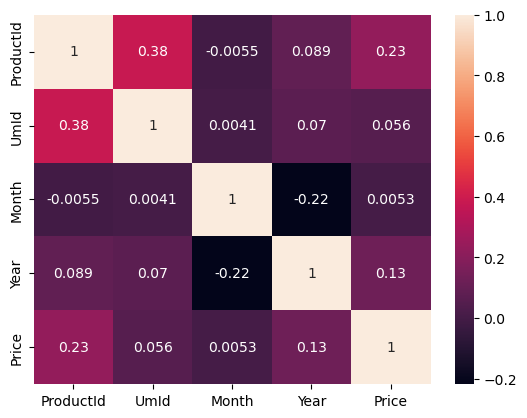

In [11]:
##ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(),annot = True);

In [12]:
df.isnull().sum()

Place          0
ProductId      0
ProductName    0
UmId           0
UmName         0
Month          0
Year           0
Price          0
dtype: int64

In [13]:
df.shape

(8249, 8)

<Axes: >

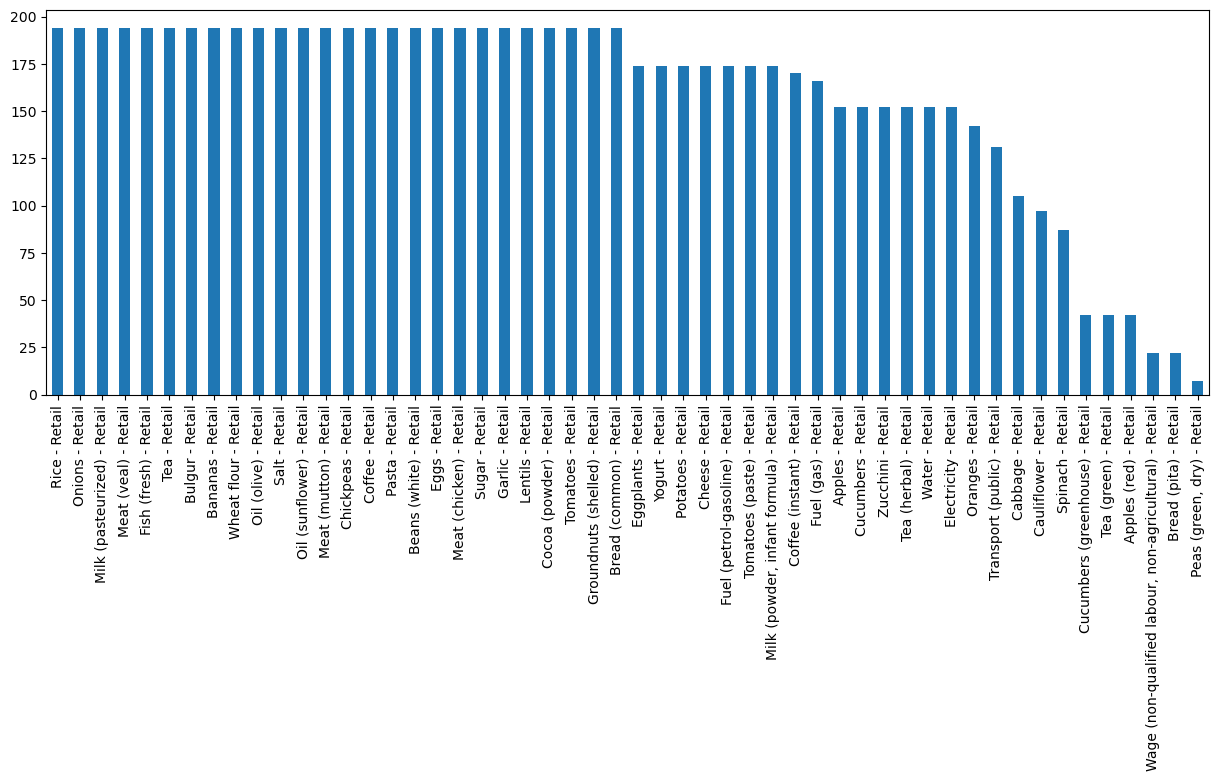

In [14]:
plt.figure(figsize=(15,5))
df.ProductName.value_counts().plot.bar()

<Axes: >

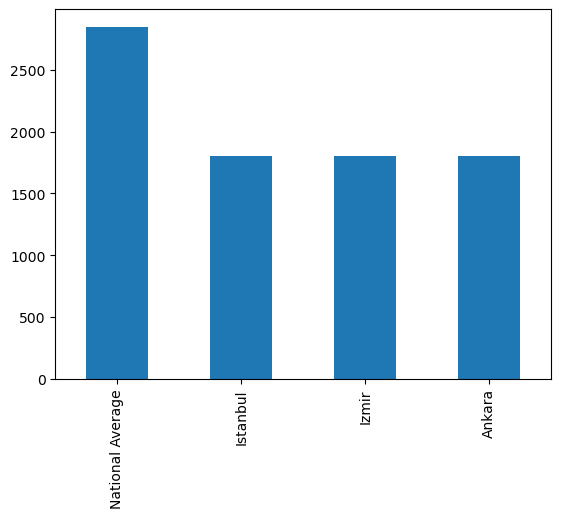

In [15]:

df.Place.value_counts().plot.bar()

<Axes: >

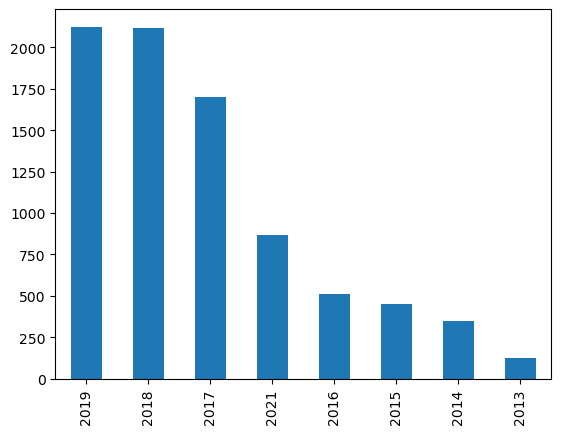

In [16]:
df.Year.value_counts().plot.bar()

In [17]:
def fnc_regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [18]:
x,y=df.drop("Price",axis=1),df["Price"]

In [19]:
x=pd.get_dummies(x,drop_first=True)

In [21]:
fnc_regression_funct(x,y)

,R_Squared,RMSE,MAE
KNeighborsRegressor,0.975534,3.640875,1.181779
ExtraTreeRegressor,0.964479,4.386970,0.655987
GradientBoostingRegressor,0.929851,6.164964,3.810930
LinearRegression,0.912327,6.892106,3.304039
Ridge,0.912160,6.898666,3.325590
Lasso,0.356400,18.673603,13.596893
ElasticNet,0.090930,22.193132,14.940303


# Deep Learning ile Regression Tahminlemesi

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [23]:
x=scaler.fit_transform(x)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [25]:
model=Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')#mse regression

In [26]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=50, verbose=1)

Epoch 1/50
52/52 [==============================] - 3s 34ms/step - loss: 282.4839 - val_loss: 49.0979
Epoch 2/50
52/52 [==============================] - 1s 25ms/step - loss: 50.5209 - val_loss: 34.4557
Epoch 3/50
52/52 [==============================] - 1s 25ms/step - loss: 39.6049 - val_loss: 38.4385
Epoch 4/50
52/52 [==============================] - 1s 25ms/step - loss: 33.3796 - val_loss: 46.2246
Epoch 5/50
52/52 [==============================] - 1s 25ms/step - loss: 30.2027 - val_loss: 36.1252
Epoch 6/50
52/52 [==============================] - 1s 26ms/step - loss: 29.1401 - val_loss: 26.6959
Epoch 7/50
52/52 [==============================] - 1s 26ms/step - loss: 27.6680 - val_loss: 55.7115
Epoch 8/50
52/52 [==============================] - 1s 27ms/step - loss: 39.5916 - val_loss: 34.4417
Epoch 9/50
52/52 [==============================] - 1s 25ms/step - loss: 28.9185 - val_loss: 36.5236
Epoch 10/50
52/52 [==============================] - 1s 25ms/step - loss: 25.5822 - val_lo

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               34304     
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               2

<Axes: >

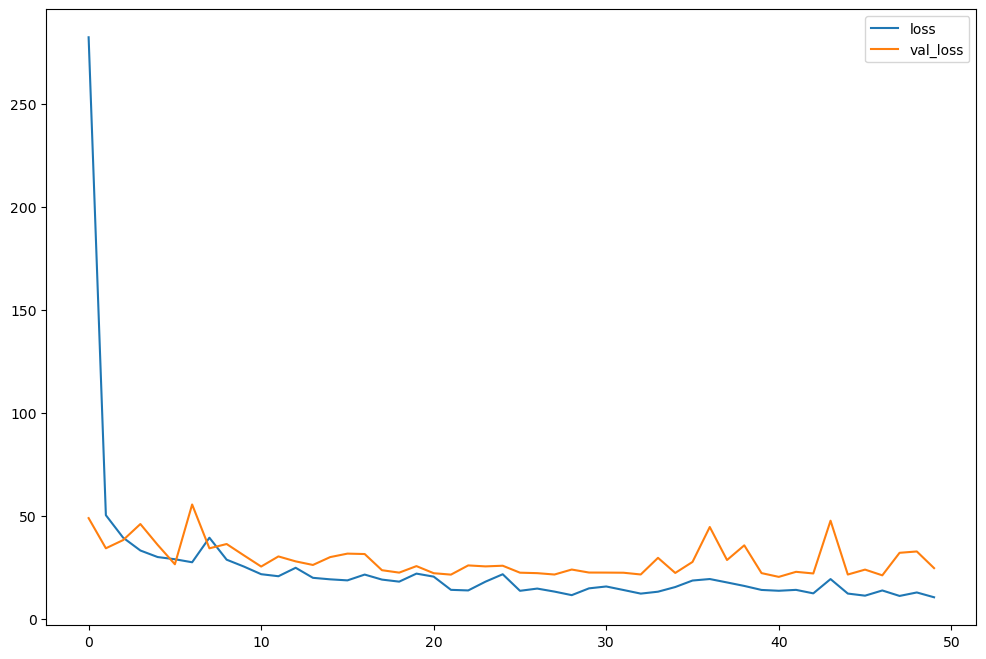

In [28]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [29]:
pred=model.predict(x_test)

52/52 [==============================] - 0s 6ms/step


In [30]:
(mean_squared_error(y_test,pred))**.5

4.982079806156599

In [31]:
r2_score(y_test,pred) 

0.9541877716781594